## Observations and Insights 

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import statistics as sts
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results=pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
# Display the data table for preview
mouse_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_results["Mouse ID"].nunique()

249

In [3]:

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_df=mouse_results
duplicate_mouse=duplicate_df.duplicated(["Mouse ID", "Timepoint"])
duplicate_df["Duplicate"]=duplicate_mouse
mouse_duplicate=duplicate_df[(duplicate_df["Duplicate"]==True)]
mouse_duplicate.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate
909,g989,Propriva,Female,21,26,0,45.000000,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data=mouse_results[(mouse_results["Mouse ID"]=="g989")]
duplicate_mouse_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate
908,g989,Propriva,Female,21,26,0,45.000000,0,False
909,g989,Propriva,Female,21,26,0,45.000000,0,True
910,g989,Propriva,Female,21,26,5,48.786801,0,False
911,g989,Propriva,Female,21,26,5,47.570392,0,True
912,g989,Propriva,Female,21,26,10,51.745156,0,False
913,g989,Propriva,Female,21,26,10,49.880528,0,True
914,g989,Propriva,Female,21,26,15,51.325852,1,False
915,g989,Propriva,Female,21,26,15,53.442020,0,True
916,g989,Propriva,Female,21,26,20,55.326122,1,False
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_results=mouse_results[(mouse_results["Mouse ID"]!="g989")]
#removing extra row created in previous step
clean_mouse_results=clean_mouse_results[["Mouse ID", "Drug Regimen", "Sex", "Age_months", "Weight (g)", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites"]]
clean_mouse_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:

# Checking the number of mice in the clean DataFrame.
clean_mouse_results["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

#groupby
regimen_grouped=clean_mouse_results.groupby(["Drug Regimen"])
#mean
regimen_mean=regimen_grouped["Tumor Volume (mm3)"].mean()
#median
regimen_median=regimen_grouped["Tumor Volume (mm3)"].median()

#variance
regimen_variance=regimen_grouped.var()["Tumor Volume (mm3)"]
regimen_variance

#standard deviation
regimen_sd=regimen_grouped.std()["Tumor Volume (mm3)"]
regimen_sd

#standard error
regimen_se=regimen_grouped.sem()["Tumor Volume (mm3)"]
regimen_se

#Creating the Table
regimen_summary_statistics=pd.DataFrame({"Mean Tumor Volume": regimen_mean,
                            "Median Tumor Volume": regimen_median,
                            "Tumor Volume Variance": regimen_variance,
                            "Tumor Volume St. Dev.": regimen_sd,
                            "Tumor Volume  Std. Err.": regimen_se})
regimen_summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume St. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

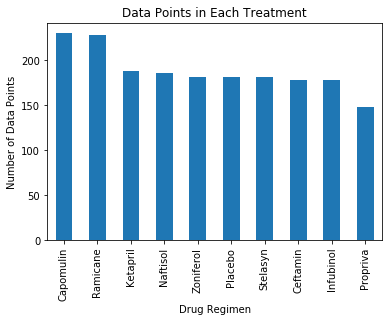

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_per_drug=clean_mouse_results["Drug Regimen"].value_counts()
mice_per_drug.sort_values(ascending=False)
mice_per_drug.plot(kind="bar", title="Data Points in Each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()

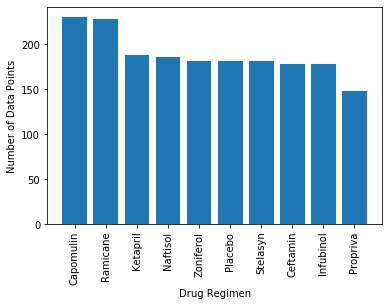

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(mice_per_drug.index.values, mice_per_drug.values)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()

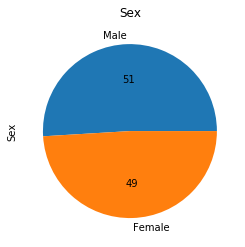

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
clean_mouse_results.head()
mouse_sex=clean_mouse_results["Sex"].value_counts()
mouse_sex
mouse_sex.plot(kind="pie", title="Sex", autopct='%.0f')
plt.show()

Text(0.5, 1.0, 'Sex')

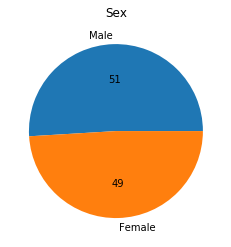

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Male", "Female"]
plt.pie(mouse_sex, labels=labels, autopct='%.0f')
plt.title("Sex")


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_mouse_results.groupby(['Mouse ID'])['Timepoint'].max()
max_timepoint = max_timepoint.reset_index()
max_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#greatest_timepoint=pd.DataFrame


merge_data = max_timepoint.merge(clean_mouse_results, on = ['Mouse ID', 'Timepoint'],how ="left" )
merge_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
#for drug in drug list
#
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in treatment_list:
    

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = merge_data.loc[merge_data["Drug Regimen"]==x, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_list.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quart = tumor_volume.quantile([.25,.5,.75])
    lower_quartile = quart[0.25]
    upper_quartile = quart[0.75]
    iqr = upper_quartile -lower_quartile
    #Find upper and lower bounds
    lowerB = lower_quartile - (1.5*iqr)
    upperB = upper_quartile + (1.5*iqr)
    print(f"For {x}, the lower quartile is {lower_quartile}, the upper quartile is {upper_quartile}, the IQR is {iqr}, the lower bound is {lowerB}, and the upper bound is {upperB}" )
    finding_outlier = tumor_volume.loc[(tumor_volume < lowerB) | (tumor_volume > upperB)]
    print(f"Drug Name: {x} and the outlier for it is: {finding_outlier}")
 

For Capomulin, the lower quartile is 32.37735684, the upper quartile is 40.1592203, the IQR is 7.781863460000004, the lower bound is 20.70456164999999, and the upper bound is 51.83201549
Drug Name: Capomulin and the outlier for it is: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Ramicane, the lower quartile is 31.56046955, the upper quartile is 40.65900627, the IQR is 9.098536719999998, the lower bound is 17.912664470000003, and the upper bound is 54.30681135
Drug Name: Ramicane and the outlier for it is: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Infubinol, the lower quartile is 54.04860769, the upper quartile is 65.52574285, the IQR is 11.477135160000003, the lower bound is 36.83290494999999, and the upper bound is 82.74144559000001
Drug Name: Infubinol and the outlier for it is: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
For Ceftamin, the lower quartile is 48.72207785, the upper quartile is 64.29983003, the IQR is 15.577752179999997, the lower

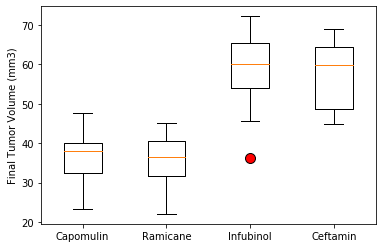

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#fig ax way may need to do ax1 ax2 ax2
markercolor = dict(markerfacecolor = "red", markersize = 10)
plt.boxplot(tumor_list, labels = treatment_list, flierprops=markercolor)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Treatment for Mouse s185')

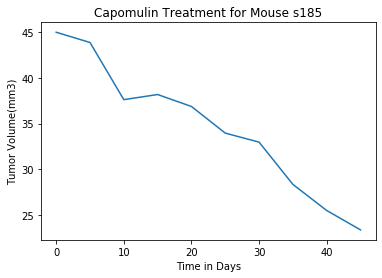

In [25]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#get dataframe of mice treated with Capomulin
capomulin=clean_mouse_results[(clean_mouse_results["Drug Regimen"]=="Capomulin")]
#examine dataframe and select first mouse
capomulin.head()
#create dataframe of just that mouse
capomulin_s185=capomulin[(capomulin["Mouse ID"]=="s185")]
capomulin_s185
x_axis=capomulin_s185["Timepoint"]
y_axis=capomulin_s185["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)
plt.xlabel("Time in Days")
plt.ylabel("Tumor Volume(mm3)")
plt.title("Capomulin Treatment for Mouse s185")

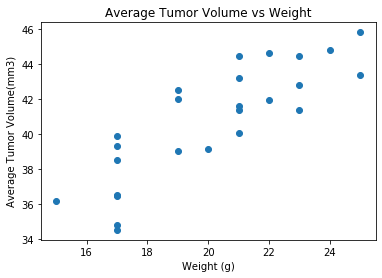

In [47]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#do groupby mouseid and then mean of weight and tumor volume
mouse_grouped=capomulin.groupby(["Mouse ID"])
weight_mean=mouse_grouped["Weight (g)"].mean()
weight_mean
volume_mean=mouse_grouped["Tumor Volume (mm3)"].mean()
volume_mean
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume(mm3)")
plt.title("Average Tumor Volume vs Weight")
plt.scatter(weight_mean, volume_mean)

## Correlation and Regression

(0.8419363424694717, 1.322572243471279e-07)
The correlation for mouse weight and average tumor volume is .84


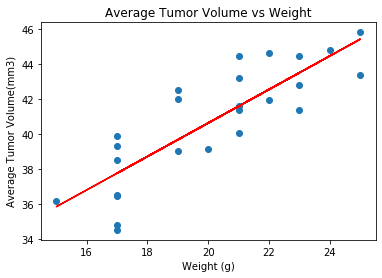

In [56]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#correlation
correlation=st.pearsonr(weight_mean, volume_mean)
print(correlation)
print("The correlation for mouse weight and average tumor volume is .84")
#linear regression
(slope, intercept, rvalue, pvalue, stdder)=st.linregress(weight_mean, volume_mean)
regress_values=weight_mean * slope + intercept
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume(mm3)")
plt.title("Average Tumor Volume vs Weight")
plt.scatter(weight_mean, volume_mean)
plt.plot(weight_mean, regress_values, "r-")

In [ ]:
# 3 observations and insights on the data
# 1. Mice that have a larger mass tend to have a higher tumor volume. This is statistically significant, but we cannot determine if the larger weight causes the 
# larger tumor volume, or vice versa. 
# 2. For mouse s185 tumor volume was reduced over time when being treated with Capomulin. With the statistical tests conducted we cannot prove that Capomulin 
# caused the mouse's tumor to decrease. 
#3. As shown by the means in the boxplot, mice who received Capomulin and Ramicane had lower tumor volumes than mice who received Infubinol and Ceftamin.
# This suggests, but does not prove,that Capomulin and Ramicane are better at decreasing tumor volume in mice than Infubinol and Ceftamin.